In [0]:
import pandas as pd
import numpy as np

In [0]:
url = 'https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv?token=AYxzdiGnjM610dBT7PuwUnUNOmm3bGcvks5ZFDyLwA%3D%3D'
path = 'C:/Users/lkishtipat001/Documents/Python/Machine Learning/Linear regression/'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
#bikes_df = pd.read_csv(path+'attachment_bikeshare.csv')

In [3]:
bikes.head()
#bikes_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
bikes.rename(columns={'count':'Total'},inplace=True)

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Visualizing Data**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

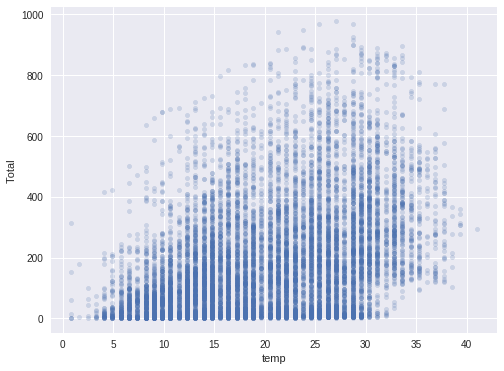

In [8]:
bikes.plot(kind='scatter',x='temp',y='Total',alpha=0.2)

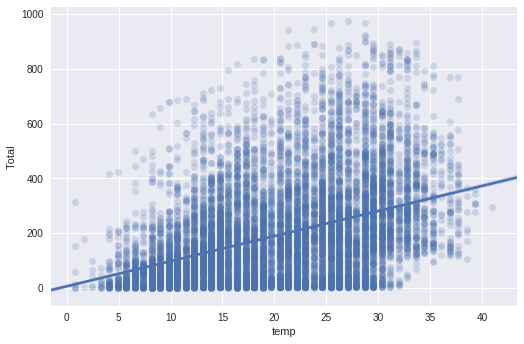

In [9]:
sns.lmplot(x='temp',y='Total',data= bikes,aspect=1.5,scatter_kws={'alpha':0.2})

**`Building Linew Regression Model`**

In [0]:
# Create X adn Y

feature_cols = ['temp']
x = bikes[feature_cols]
y = bikes.Total

In [11]:
# Create instance
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616611
[9.17054048]


# Using the Model for Prediction

In [13]:
# Manual way for 25 temp, what is the count of bikes
linreg.intercept_+linreg.coef_*25


array([235.309725])

In [14]:
linreg.predict(25)

array([235.309725])

# Does the Scale of feature matters?

In [0]:
# Creating new column for Foreinheat temp
bikes['temp_f'] = bikes['temp']*1.8+32

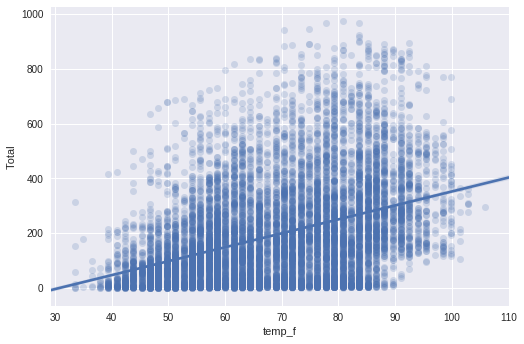

In [16]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_f', y='Total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [17]:
# Create X and Y

feature_cols = ['temp_f']
x = bikes[feature_cols]
y = bikes.Total

# Creating Instance

linreg = LinearRegression()
linreg.fit(x,y)

#print Coeff and intercept

print(linreg.intercept_)
print(linreg.coef_)

-156.9856178212945
[5.09474471]


In [18]:
# COnvert 32 degrees elcius to fahrenheit
print(1.8*25+32)

77.0


In [19]:
linreg.predict(77)

array([235.309725])

**Conclusion**: The scale of the features is irrelevant for linear regression models. When changing the scale, we simply change our interpretation of the coefficients.

In [0]:
# remove temp_f column
bikes.drop('temp_f',axis=1,inplace=True)

## Visualizing the data (part 2)

In [0]:
# Explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

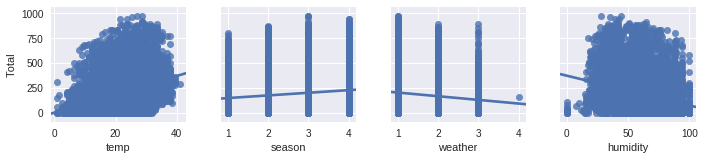

In [22]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='Total', kind='reg')

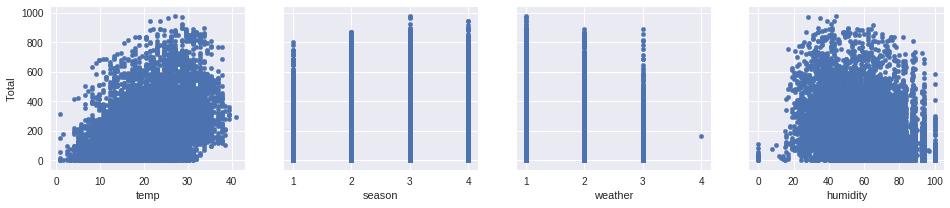

In [23]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='Total', ax=axs[index], figsize=(16, 3))

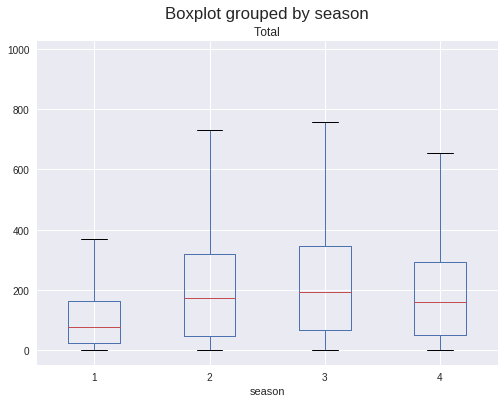

In [24]:
bikes.boxplot(column='Total',by='season')

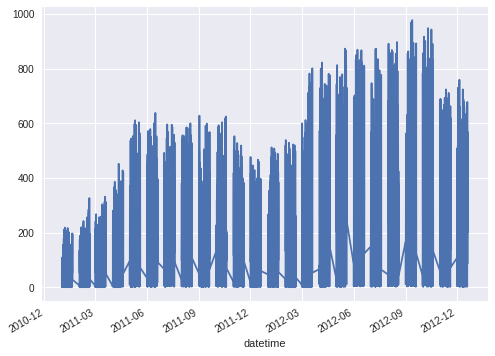

In [25]:
bikes.Total.plot()

## Adding more features to the model

In [0]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [27]:
# create X and y
x = bikes[feature_cols]
y = bikes.Total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(x, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

159.5206878612979
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [28]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp', 7.86482499247745),
 ('season', 22.538757532466768),
 ('weather', 6.670302035923734),
 ('humidity', -3.118873382396501)]

## Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [0]:
# example true and predicted response values
true = [10,7,5,5]
pred = [8,6,5,10]


In [30]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(true,pred))
print('MSE : ',metrics.mean_squared_error(true,pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(true,pred)))

MAE :  2.0
MSE :  7.5
RMSE :  2.7386127875258306


In [31]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


## Comparing models with train/test split and RMSE

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
def train_test_rmse(feature_cols):
  x = bikes[feature_cols]
  y = bikes.Total
  x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=123)
  linreg = LinearRegression()
  linreg.fit(x_train,y_train)
  y_pred = linreg.predict(x_test)
  return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [34]:
# compare different sets of features
print(train_test_rmse(['temp','season','weather','humidity']))
print(train_test_rmse(['temp','season','weather']))
print(train_test_rmse(['temp','season','humidity']))

155.64945913079674
164.1653997629182
155.59818936691417


In [35]:
# using these as features is not allowed!
print (train_test_rmse(['casual', 'registered']))

3.8228183176583084e-14


## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [36]:
x = bikes[['temp','season','humidity']]
y = bikes.Total
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=123)
y_null = np.zeros_like(y_test,dtype=float)
y_null.fill(y_test.mean())
y_null

array([192.26451139, 192.26451139, 192.26451139, ..., 192.26451139,
       192.26451139, 192.26451139])

In [37]:
#Compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_null))

179.57906896465727

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [42]:
#Create Dummy Variables for season
season_dummies = pd.get_dummies(bikes.season,prefix='season')
#Print 5 random rows
season_dummies.sample(n=5,random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


However, we actually only need **three dummy variables (not four)**, and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the **baseline level:**

In [43]:
season_dummies.drop(season_dummies.columns[0],axis=1,inplace=True)

season_dummies.sample(n=5,random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In general, if you have a categorical feature with **k possible values**, you create **k-1 dummy variables**.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).

In [44]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes,season_dummies],axis=1)
bikes.sample(n=5,random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [45]:
feature_cols = ['temp','season_2','season_3','season_4','humidity']
x = bikes[feature_cols]
y = bikes.Total
linreg = LinearRegression()
linreg.fit(x,y)
list(zip(feature_cols,linreg.coef_))

[('temp', 11.18640586357579),
 ('season_2', -3.390543099718222),
 ('season_3', -41.736860713170735),
 ('season_4', 64.41596146824212),
 ('humidity', -2.8194816362596473)]

How do we interpret the season coefficients? They are **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our **interpretation** of the coefficients.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [47]:
# compare original season variables with dummy variables
print(train_test_rmse(['temp','season','humidity']))
print(train_test_rmse(['temp','season_2','season_3','season_4','humidity']))

155.59818936691417
154.33394593635998


## Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [48]:
bikes['hour'] = bikes.index.hour
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total,season_2,season_3,season_4,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,0,0,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,0,0,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,0,0,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,0,0,4


In [54]:
#hour as a categorical feature
hour_dummies = pd.get_dummies(bikes['hour'],prefix='hour')
hour_dummies.sample(n=5,random_state=1)
hour_dummies.drop(hour_dummies.columns[0],axis=1,inplace=True)
bikes = pd.concat([bikes,hour_dummies],axis=1)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [0]:
#daytime as a categorical variable
bikes['daytime'] = ((bikes['hour']>6) & (bikes.hour<21)).astype('int')

In [63]:
bikes.columns[bikes.columns.str.startswith('hour_')]

Index(['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [64]:
print(train_test_rmse(['hour']))
print(train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print(train_test_rmse(['daytime']))

165.67174264111398
128.3112050281119
144.89116360237938
